# 机器学习简介

本实验介绍了使用 Python 进行机器学习的一些基本概念。 在本实验中，您将使用 K 最近邻 (KNN) 算法根据花朵特征的测量结果对鸢尾花的种类进行分类。 完成本实验后，您将大致了解端到端机器学习建模过程。

完成本实验后，您将：
1. 遵循并理解完整的端到端机器学习流程，包括数据探索、数据准备、建模和模型评估。
2. 对机器学习原理和相关术语有基本的了解。
3. 了解评估机器学习模型的基本过程。

## KNN分类概述

在讨论特定算法之前，了解一些机器学习术语会有所帮助。 在有监督的机器学习中，一组 ***案例/cases*** 用于 ***训练/train***、***测试/test*** 和 ***评估/evaluate*** 模型。 每个案例都由一个或多个 ***features*** 的值和一个 ***label*** 值组成。 这些特征是模型用来***预测/predict**标签值的变量。 最小化标签真实值与预测值之间的***误差/errors***监督该模型的训练。 一旦模型经过训练和测试，就可以根据预测一组新案例标签的准确性对其进行评估。

在本实验中，您将使用随机选择的案例首先训练然后评估 k 最近邻 (KNN) 机器学习模型。 目标是预测标签的类型或类别，这使得机器学习模型成为***分类***模型。

k 最近邻算法在概念上很简单。 事实上，没有正式的培训步骤。 给定一组已知的案例，新案例通过 K（其中 $k = 1、2、3$ 等）最接近新案例值的点的多数投票进行分类； 即，新案例的最近邻居。

下图说明了 KNN 分类器的基本概念。 在这种情况下，有两个特征，一个的值显示在水平轴上，另一个的值显示在垂直轴上。 这些案例在图表上显示为两个类别之一，红色三角形和蓝色圆圈。 总而言之，每个案例都有两个特征的值和一个类。 KNN 算法的目标是对具有未知标签的案例进行分类。

继续该示例，在图的左侧说明了 $K = 1$ 的情况。 最近的邻居是一个红色三角形。 因此，此 KNN 算法会将未知案例“？”分类为红色三角形。 在图的右侧，说明了 $K = 3$ 的情况。 圈内有三个近邻。 $K = 3$ 的大多数最近邻是蓝色圆圈，因此该算法将未知案例“?”分类为蓝色圆圈。 请注意，随着 K 的变化，未知案例的预测类别也会发生变化。 这种行为是 KNN 方法固有的。

<img src="img/KNN.jpg" width='800'/>

<center>**KNN for k = 1 and k = 3**</center>

在创建稳健的 KNN 算法时还有一些额外的考虑因素。 这些将在本课程的后面解决。

## 检查数据集

在本实验中，您将使用 Iris 数据集。 这个数据集在统计史上是有名的。 1936 年，先驱统计学家罗纳德·A·费舍尔 (Ronald A Fisher) 首次使用这些数据进行统计。费舍尔提出了一种算法，可根据鸢尾花特征的物理测量值对鸢尾花的种类进行分类。 从那以后，该数据集一直被用作教学示例。

现在，您将加载并检查 statsmodels.api 包中的这些数据。 执行下面单元格中的代码并检查数据框的前几行。

In [1]:
import pandas as pd
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn

## Import the dataset from sklearn.datasets
iris = datasets.load_iris()

#### 观察加载的数据

In [ ]:
iris

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris.DESCR

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
## Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

有四个特征，包含鸢尾花结构部分的尺寸。 标签栏是花的种类。 目标是创建和测试 KNN 算法以正确分类物种。

接下来，您将执行下面单元格中的代码以显示每列的数据类型。

In [11]:
iris.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

特征都是数字，标签是分类字符串变量。

接下来，您将为标签变量 Species 确定唯一类别的数量以及每个类别的个案数量。 执行下面单元格中的代码并检查结果。

In [12]:
iris['count'] = 1
iris[['Species', 'count']].groupby('Species').count()

,count
Species,
setosa,50
versicolor,50
virginica,50


你可以看到共有三种鸢尾，每种都有 50 例。

接下来，您将创建一些图来查看类可能如何或可能不会被特征值很好地分开。 在理想情况下，标签类将被一个或多个特征对完全分开。 在现实世界中，这种理想情况很少（如果有的话）出现。

这四个特征有六个可能的成对散点图。 现在，我们将只创建两个变量对的散点图。 执行下面单元格中的代码并检查结果图。
***
**注意：** 数据可视化和 Seaborn 包在另一节课中介绍。
***

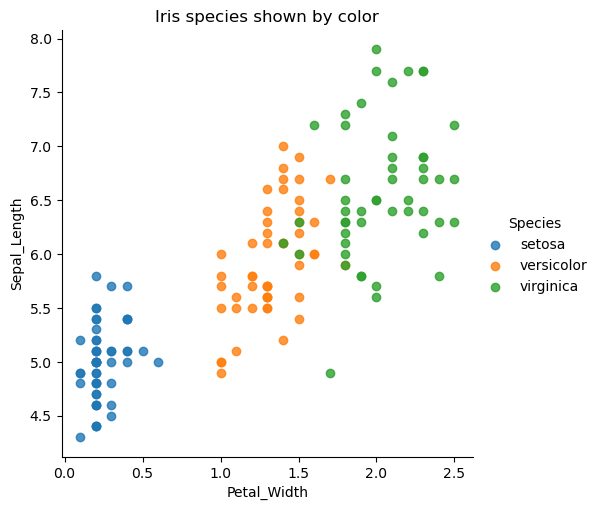

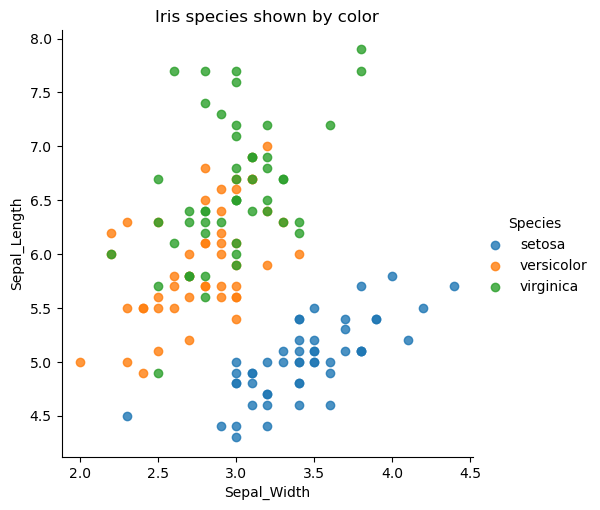

In [13]:
%matplotlib inline
def plot_iris(iris, col1, col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x = col1, y = col2, 
               data = iris, 
               hue = "Species", 
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species shown by color')
    plt.show()
plot_iris(iris, 'Petal_Width', 'Sepal_Length')
plot_iris(iris, 'Sepal_Width', 'Sepal_Length')

检查这些结果，注意标签值的分离或重叠。

然后，回答课程页面上的**问题 1**。

## 准备数据集

数据准备是训练任何机器学习模型之前的重要步骤。 这些数据只需要两个准备步骤：
- 缩放特征的数值。 重要的是，用于训练机器学习模型的数字特征具有相似的值范围。 否则，恰好具有大数值的特征可能会主导模型训练，即使其他具有较小数值的特征提供更多信息。 在这种情况下，使用 Zscore 归一化。 此归一化过程对每个特征进行缩放，使均值为 0，方差为 1.0。
- 将数据集拆分为随机采样的训练和评估数据集。 案例的随机选择旨在限制训练案例和评估案例之间的信息泄漏。

下面单元格中的代码通过以下步骤对特征进行归一化：
- scikit-learn.preprocessing 中的比例函数(scale)用于规范化特征。
- 列名分配给生成的数据框(dataframe)。
- 然后打印数据框(dataframe)的统计摘要。

***
**注意：** 使用 scikit-learn 准备数据在另一节课中介绍。
***

执行此代码并检查结果。

Scikit-learn Preprocessing 预处理技术的几种方法，主要包括标准化、数据最大最小缩放处理、正则化、特征二值化和数据缺失值处理。

## 基础知识

* 均值公式：

$$\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_{i}$$

* 方差公式：

$$s^{2}=\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}$$

* 0-范数，向量中非零元素的个数。

* 1-范数：

$$||X||= \sum_{i=1}^{n} |x_{i}|$$

* 2-范数：

$$||X||_{2}= (\sum_{i=1}^{n} x_{i}^{2})^{\frac{1}{2}}$$

* p-范数的计算公式：

$$||X||_{p}=(|x1|^{p}+|x2|^{p}+...+|xn|^{p})^{\frac{1}{p}}$$

* 数据标准化：

    当单个特征的样本取值相差甚大或明显不遵从高斯正态分布时，标准化表现的效果较差。实际操作中，经常忽略特征数据的分布形状，移除每个特征均值，划分离散特征的标准差，从而等级化，进而实现数据中心化。

## 标准化(Standardization)，或者去除均值和方差进行缩放

公式为：$(X-X_{mean})/X_{std}$ 计算时对每个属性/每列分别进行.

将数据按其属性(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个属性/每列来说所有数据都聚集在0附近，方差值为1。

首先说明下sklearn中preprocessing库里面的scale函数使用方法：

```python
sklearn.preprocessing.scale(X, axis=0, with_mean=True,with_std=True,copy=True)
```

根据参数的不同，可以沿任意轴标准化数据集。

参数解释：

* X：数组或者矩阵
* axis：int类型，初始值为0，axis用来计算均值 means 和标准方差 standard deviations. 如果是0，则单独的标准化每个特征（列），如果是1，则标准化每个观测样本（行）。
* with_mean: boolean类型，默认为True，表示将数据均值规范到0
* with_std: boolean类型，默认为True，表示将数据方差规范到1

**一个简单的例子**

假设现在我构造一个数据集X，然后想要将其标准化。下面使用不同的方法来标准化X：

**方法一：使用sklearn.preprocessing.scale()函数**

**方法说明：**

* X.mean(axis=0)用来计算数据X每个特征的均值；
* X.std(axis=0)用来计算数据X每个特征的方差；
* preprocessing.scale(X)直接标准化数据X。

将代码整理到一个文件中：

In [18]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
# calculate mean
X_mean = X.mean(axis=0)
print("均值")
print(X_mean)
# calculate variance
X_std = X.std(axis=0)
print("标准差")
print(X_std)
# standardize X
X1 = (X-X_mean)/X_std
print("标准化")
print(X1)
# use function preprocessing.scale to standardize X
X_scale = preprocessing.scale(X)
X_scale

均值
[1.         0.         0.33333333]
标准差
[0.81649658 0.81649658 1.24721913]
标准化
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

最后X_scale的值和X1的值是一样的，前面是单独的使用数学公式来计算，主要是为了形成一个对比，能够更好的理解scale()方法。

**方法2：sklearn.preprocessing.StandardScaler类**

该方法也可以对数据X进行标准化处理，实例如下：

In [20]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

这两个方法得到最后的结果都是一样的。

---

## **三、将特征的取值缩小到一个范围（如0到1）**

除了上述介绍的方法之外，另一种常用的方法是将属性缩放到一个指定的最大值和最小值(通常是1-0)之间，这可以通过preprocessing.MinMaxScaler类来实现。

使用这种方法的目的包括：

* 1、对于方差非常小的属性可以增强其稳定性；
* 2、维持稀疏矩阵中为0的条目。

下面将数据缩至0-1之间，采用MinMaxScaler函数

In [21]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_minMax = min_max_scaler.fit_transform(X)
X_minMax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

测试用例：

In [22]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

注意：这些变换都是对列进行处理。

## **四、正则化(Normalization)**

正则化的过程是将每个样本缩放到单位范数(每个样本的范数为1)，如果要使用如二次型(点积)或者其它核方法计算两个样本之间的相似性这个方法会很有用。

该方法是文本分类和聚类分析中经常使用的向量空间模型（Vector Space Model)的基础.

Normalization主要思想是对每个样本计算其p-范数，然后对该样本中每个元素除以该范数，这样处理的结果是使得每个处理后样本的p-范数(l1-norm,l2-norm)等于1。

**方法1：使用sklearn.preprocessing.normalize()函数**

In [27]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

**方法2：sklearn.preprocessing.StandardScaler类**

In [28]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer()

然后使用正则化实例来转换样本向量：

In [29]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [30]:
normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

两种方法都可以，效果是一样的。

---

## **五、二值化(Binarization)**

特征的二值化主要是为了将数据特征转变成boolean变量。在sklearn中，sklearn.preprocessing.Binarizer函数可以实现这一功能。实例如下：

In [31]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer

Binarizer()

In [32]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Binarizer函数也可以设定一个阈值，结果数据值大于阈值的为1，小于阈值的为0，实例代码如下：

In [33]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

## **六、缺失值处理**

由于不同的原因，许多现实中的数据集都包含有缺失值，要么是空白的，要么使用NaNs或者其它的符号替代。这些数据无法直接使用scikit-learn分类器直接训练，所以需要进行处理。幸运地是，sklearn中的**Imputer**类提供了一些基本的方法来处理缺失值，如使用均值、中位值或者缺失值所在列中频繁出现的值来替换。

# **SimpleImputer类参数**

```python
sklearn.impute.SimpleImputer(
missing_values=nan,
strategy='mean',
fill_value=None,
verbose=0,
copy=True,
add_indicator=False)
```

> **misssing_values:** number,string,np.nan(default) or None，缺失值的占位符，所有出现的占位符都将被计算

> **strategy:** string,default=‘mean’
>
> 计算并替换的策略：
>
> "mean，使用该列的平均值替换缺失值。仅用于数值数据；
>
> “median”，使用该列的中位数替换缺失值。仅用于数值数据；
>
> “most_frequent”，使用每个列中最常见的值替换缺失值。可用于非数值数据；
>
> “constant”，用fill_value替换缺失值。可用于非数值数据。

> **fill_value:** string or numerical value,default=None
>
> 当strategy为"constant"，使用fil_value替换missing_values。如果是default，使用0替换数值数据，使用"missing_value"替换字符串或对象数据类型

> **verbose:** integer,default=0     controls the verbosity of the imputer

> **copy:** boolean,default=True
>
> True: 将创建X的副本；False: 只要有可能，就会原地替换。注意以下情况即使copy=False，也会创建新的副本：
>
> 1.X不是一个浮点值数组；
>
> 2.X编码为CSR矩阵；
>
> 3.add_indicator=True

> **add_indicator:** boolean,default=False
>
> True，则MissingIndicator将叠加到输入器转换的输出上。这样即使进行了imputation归算，也同样会让预测估算器描述缺失值。如果某个特征在fit/train时没有缺失值，那么即使在transform/tes时有缺失值，该特征也不会出现在缺失的指示器上。

下面是使用均值来处理的实例：

In [38]:
import numpy as np
# 0.22以上版本的sklearn去除了Imputer类，因此需要使用SimpleImputer类代替
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
imp
# Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

SimpleImputer()

In [39]:
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


多尝试一些不同的填充策略。也许在某些项目中，你会发现，使用缺失值所在列的中位数或众数来填充缺失值会更加合理。填充策略之类的决策看似细微，但其实意义重大。因为流行通用的方法并不一定就是正确的选择，对于模型而言，均值也不一定是最优的缺失填充选择

## **如果包含属性数据，会怎么样呢？**

这是一个好问题。没有办法明确地计算诸如猫、狗、麋鹿的均值。那么可以怎么做呢？可以将属性数据编码为数值！你可能希望使用 sklearn.preprocessing 所提供的 LabelEncoder 类。从你希望进行编码的某列数据入手，调用 label encoder 并拟合在你的数据上。



In [40]:
dataset = pd.read_csv('my_data.csv')
dataset

,Animal,Age,Worth,Friendly
0,Cat,4.0,72000.0,No
1,Dog,17.0,48000.0,Yes
2,Moose,6.0,54000.0,No
3,Dog,8.0,61000.0,No
4,Moose,4.0,NaN,Yes
5,Cat,15.0,58000.0,Yes
6,Dog,NaN,52000.0,No
7,Cat,12.0,79000.0,Yes
8,Moose,5.0,83000.0,No
9,Cat,7.0,67000.0,Yes


In [41]:
X_animal = dataset.iloc[:, :-1].values
X_animal

array([['Cat', 4.0, 72000.0],
       ['Dog', 17.0, 48000.0],
       ['Moose', 6.0, 54000.0],
       ['Dog', 8.0, 61000.0],
       ['Moose', 4.0, nan],
       ['Cat', 15.0, 58000.0],
       ['Dog', nan, 52000.0],
       ['Cat', 12.0, 79000.0],
       ['Moose', 5.0, 83000.0],
       ['Cat', 7.0, 67000.0]], dtype=object)

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X_animal[:, 0] = labelencoder_X.fit_transform(X_animal[:, 0])
X_animal

array([[0, 4.0, 72000.0],
       [1, 17.0, 48000.0],
       [2, 6.0, 54000.0],
       [1, 8.0, 61000.0],
       [2, 4.0, nan],
       [0, 15.0, 58000.0],
       [1, nan, 52000.0],
       [0, 12.0, 79000.0],
       [2, 5.0, 83000.0],
       [0, 7.0, 67000.0]], dtype=object)

这就是将第一列中的属性变量替换为数值所需的全部工作了。例如，猫将用 0 表示，狗将用 1 表示，麋鹿将用 2 表示。

## **你发现什么潜在问题了吗？**

标注体系暗含以下信息：所使用的数值层级关系可能会影响模型结果：3 比 0 的数值大，但猫并不一定比麋鹿大。

**我们需要创建哑变量。**

我们可以为猫创建一列数据，为麋鹿创建一列数据，……以此类推。然后，将每一列分别以 0/1 填充（认为 1=Yes，0 = No）。这表明，如果原始列的值为猫，那么就会在麋鹿一列得到 0，狗一列得到 0，猫一列得到 1。

看上去非常复杂。**输入 OneHotEncoder 吧！**

In [46]:
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder()

接着是一点拟合和转换。

In [47]:
X_animal = oneHotEncoder.fit_transform(X_animal).toarray()
X_animal

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
dataset = pd.read_csv('my_data.csv')
X_animal = dataset.iloc[:, :-1].values
label_encoder_x_1 = LabelEncoder()
X_animal[: , 0] = label_encoder_x_1.fit_transform(X_animal[:,0])
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [0]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X_animal = transformer.fit_transform(X_animal.tolist())
X_animal = X_animal.astype('float64')
X_animal

array([[1.0e+00, 0.0e+00, 0.0e+00, 4.0e+00, 7.2e+04],
       [0.0e+00, 1.0e+00, 0.0e+00, 1.7e+01, 4.8e+04],
       [0.0e+00, 0.0e+00, 1.0e+00, 6.0e+00, 5.4e+04],
       [0.0e+00, 1.0e+00, 0.0e+00, 8.0e+00, 6.1e+04],
       [0.0e+00, 0.0e+00, 1.0e+00, 4.0e+00,     nan],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.5e+01, 5.8e+04],
       [0.0e+00, 1.0e+00, 0.0e+00,     nan, 5.2e+04],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.2e+01, 7.9e+04],
       [0.0e+00, 0.0e+00, 1.0e+00, 5.0e+00, 8.3e+04],
       [1.0e+00, 0.0e+00, 0.0e+00, 7.0e+00, 6.7e+04]])

## **训练集与测试集的划分**

现在，你可以开始将数据集划分为训练集和测试集了。**要将你的数据分为训练集和测试集，永远不要用测试集来训练！** 需要避免过拟合（可以认为，过拟合就像在一次测验前，记忆了许多细节，但没有理解其中的信息。如果只是记忆细节，那么当你自己在家复习知识卡片时，效果会很好，但在所有会考察新信息的真实测验中，都会不及格。）

现在，我们有了需要学习的模型。模型需要在数据上训练，并在另外的数据上完成测试。对训练集的记忆并不等于学习。模型在训练集上学习得越好，就应该在测试集给出更好的预测结果。过拟合永远都不是你想要的结果，学习才是！

首先，导入：

In [50]:
from sklearn.model_selection import train_test_split

现在，可以创建 X_train、X_test、y_train 和 y_test 集合了。

In [51]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
X_train

array([['Moose', 4.0, nan],
       ['Cat', 7.0, 67000.0],
       ['Dog', 17.0, 48000.0],
       ['Dog', nan, 52000.0],
       ['Cat', 12.0, 79000.0],
       ['Dog', 8.0, 61000.0],
       ['Cat', 4.0, 72000.0],
       ['Cat', 15.0, 58000.0]], dtype=object)

In [53]:
X_test

array([['Moose', 6.0, 54000.0],
       ['Moose', 5.0, 83000.0]], dtype=object)

In [54]:
y_train

array(['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'], dtype=object)

In [55]:
y_test

array(['No', 'No'], dtype=object)

--------------------- 回到我们的主题 ---------------------

In [56]:
num_cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
iris[num_cols]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
from sklearn.preprocessing import scale
import pandas as pd
num_cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
iris_scaled = scale(iris[num_cols])
iris_scaled = pd.DataFrame(iris_scaled, columns = num_cols)
print(iris_scaled.describe().round(3))

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count       150.000      150.000       150.000      150.000
mean         -0.000       -0.000        -0.000       -0.000
std           1.003        1.003         1.003        1.003
min          -1.870       -2.434        -1.568       -1.447
25%          -0.901       -0.592        -1.227       -1.184
50%          -0.053       -0.132         0.336        0.133
75%           0.675        0.559         0.763        0.791
max           2.492        3.091         1.786        1.712


Examine these results. The mean of each column is zero and the standard deviation is approximately 1.0.

The methods in the scikit-learn package requires numeric numpy arrays as arguments. Therefore, the strings indicting species must be re-coded as numbers. The code in the cell below does this using a dictionary lookup. Execute this code and examine the head of the data frame. 

In [ ]:
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
iris_scaled['Species'] = [levels[x] for x in iris['Species']]
iris_scaled.head()

Now, you will split the dataset into a test and evaluation sub-sets. The code in the cell below randomly splits the dataset into training and testing subsets. The features and labels are then separated into numpy arrays. The dimension of each array is printed as a check. Execute this code to create these subsets. 

***
**Note:** Splitting data sets for machine learning with scikit-learn is discussed in another lesson.
***

In [ ]:
## Split the data into a training and test set by Bernoulli sampling
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3456)
iris_split = train_test_split(np.asmatrix(iris_scaled), test_size = 75)
iris_train_features = iris_split[0][:, :4]
iris_train_labels = np.ravel(iris_split[0][:, 4])
iris_test_features = iris_split[1][:, :4]
iris_test_labels = np.ravel(iris_split[1][:, 4])
print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

## Train and evaluate the KNN model

With some understanding of the relationships between the features and the label and preparation of the data completed you will now train and evaluate a $K = 3$ model. The code in the cell below does the following:
- The KNN model is defined as having $K = 3$.
- The model is trained using the fit method with the feature and label numpy arrays as arguments.
- Displays a summary of the model. 

Execute this code and examine the summary of these results.


***
**Note:** Constructing machine learning models with scikit-learn is covered in another lesson.
***

In [ ]:
## Define and train the KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(iris_train_features, iris_train_labels)

Next, you will evaluate this model using the accuracy statistic and a set of plots. The following steps create model predictions and compute accuracy:
- The predict method is used to compute KNN predictions from the model using the test features as an argument. 
- The predictions are scored as correct or not using a list comprehension. 
- Accuracy is computed as the percentage of the test cases correctly classified. 

Execute this code, examine the results, and answer **Question 2** on the course page.

In [ ]:
iris_test = pd.DataFrame(iris_test_features, columns = num_cols)
iris_test['predicted'] = KNN_mod.predict(iris_test_features)
iris_test['correct'] = [1 if x == z else 0 for x, z in zip(iris_test['predicted'], iris_test_labels)]
accuracy = 100.0 * float(sum(iris_test['correct'])) / float(iris_test.shape[0])
print(accuracy)

The accuracy is pretty good.

Now, execute the code in the cell below and examine plots of the classifications of the iris species. 

In [ ]:
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_test['Species'] = [levels[x] for x in iris_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
def plot_shapes(df, col1,col2,  markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictioary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m)  & (df['Species'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species by color')
    return 'Done'
plot_shapes(iris_test, 'Petal_Width', 'Sepal_Length', markers, colors)
plot_shapes(iris_test, 'Sepal_Width', 'Sepal_Length', markers, colors)

In the plots above color is used to show the predicted class. Correctly classified cases are shown by triangles and incorrectly classified cases are shown by circles. 

Examine the plot and answer **Question 3** on the course page.

## Summary

In this lab you have created and evaluated a KNN machine learning classification model. Specifically you have:
1. Loaded and explored the data using visualization to determine if the features separate the classes.
2. Prepared the data by normalizing the numeric features and randomly sampling into training and testing subsets. 
3. Constructing and evaluating the machine learning model. Evaluation was performed by statistically, with the accuracy metric, and with visualization. 